In [19]:
#imports
#Do I need seaborn, matplotlib, pandas, os, matlab, pickles?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#from library.sb_utils import save_file
#I don't actually understand exactly how this line works, 
#whether it is necessary, and what I need to avoid the error 'ModuleNotFoundError'
water_data = pd.read_csv('./water_potability.csv')
###
water_data.info()
water_data.head()

<bound method NDFrame.head of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135  

In [20]:
missing = pd.concat([water_data.isnull().sum(), 100 * water_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
Sulfate,781,23.840049
ph,491,14.987790
Trihalomethanes,162,4.945055
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Turbidity,0,0.000000
Potability,0,0.000000


In [ ]:
water_data = water_data.dropna()

In [23]:
water_data.ph.rename('pH')
df2 = water_data.rename(index=str, columns={"ph":"pH", "Turbidity":"Turbidity_NTU"})
#I want to change the column names of the columns whose unit of measurement is not parts per million(ppm). 
#Those are in the dictionary, 'columns', above.
df3= df2.set_index('Turbidity_NTU').groupby('Turbidity_NTU').mean()
print(df3.Potability)
turbidity_potability_data= df3.Potability
%store turbidity_potability_data
#Here I wanted to create and store an index where mean Turbidity is sorted by Potability
                                            
df4= df2.set_index('pH').groupby('pH').mean()
print(df4.Potability)
pH_potability_data= df4.Potability
%store pH_potability_data
                                            
df5= df2.set_index('Organic_carbon').groupby('Organic_carbon').mean()
print(df5.Potability)
carbon_potability_data= df5.Potability
%store carbon_potability_data
                                            
df6= df2.set_index('Conductivity').groupby('Conductivity').mean()
print(df6.Potability)
conductivity_potability_data= df6.Potability
%store conductivity_potability_data

df7= df2.set_index('Hardness').groupby('Hardness').mean()
print(df7.Potability)
hardness_potability_data = df7.Potability
%store hardness_potability_data
                                            
df8= df2.set_index('Chloramines').groupby('Chloramines').mean()
print(df8.Potability)
chloramines_potability_data = df8.Potability
%store chloramines_potability_data

df9= df2.set_index('Trihalomethanes').groupby('Trihalomethanes').mean()
print(df9.Potability)
trihalomethanes_potability_data = df9.Potability
%store trihalomethanes_potability_data

df10= df2.set_index('Sulfate').groupby('Sulfate').mean()
print(df10.Potability)
sulfate_potability_data = df10.Potability
%store sulfate_potability_data
                                            
#remember to change the code after this so that the new column names are accessed, ie 'ph' to 'pH'

Turbidity_NTU
1.450000    0
1.492207    1
1.496101    0
1.641515    1
1.659799    1
           ..
6.357439    0
6.389161    1
6.494249    1
6.494749    0
6.739000    0
Name: Potability, Length: 3276, dtype: int64
Stored 'turbidity_potability_data' (Series)
pH
0.000000     0
0.227499     1
0.975578     0
0.989912     1
1.431782     0
            ..
12.246928    0
13.175402    1
13.349889    0
13.541240    0
14.000000    0
Name: Potability, Length: 2785, dtype: int64
Stored 'pH_potability_data' (Series)
Organic_carbon
2.200000     1
4.371899     0
4.466772     0
4.473092     0
4.861631     0
            ..
23.917601    0
23.952450    0
24.755392    0
27.006707    0
28.300000    0
Name: Potability, Length: 3276, dtype: int64
Stored 'carbon_potability_data' (Series)
Conductivity
181.483754    0
201.619737    1
210.319182    0
217.358330    1
232.613624    0
             ..
672.556999    0
674.443476    1
695.369528    1
708.226364    0
753.342620    0
Name: Potability, Length: 3276, dtype:

In [30]:
#watercolumn_list = list(df2[:0])
#this will be a for loop to complete the above actions
#for col in watercolumn_list:
#     if dtype is int, float:
    #df_col= df2.set_index(col).groupby(col).mean()
    #print(df_col.Potability)
    #col_potability_data = df_col.Potability
    #%store col_potability_data
    #need to insert a break before Potability

# df3= df2.set_index('Turbidity_NTU').groupby('Turbidity_NTU').mean()
# print(df3.Potability)
# turbidity_potability_data= df3.Potability
# %store turbidity_potability_data

pH
0.000000     0
0.227499     1
0.975578     0
0.989912     1
1.431782     0
            ..
12.246928    0
13.175402    1
13.349889    0
13.541240    0
14.000000    0
Name: Potability, Length: 2785, dtype: int64
Stored 'col_potability_data' (Series)
Hardness
47.432000     1
73.492234     1
77.459586     1
81.710895     1
94.091307     1
             ..
307.706024    1
308.253833    1
311.383956    1
317.338124    1
323.124000    1
Name: Potability, Length: 3276, dtype: int64
Stored 'col_potability_data' (Series)
Solids
320.942611      0
728.750830      1
1198.943699     1
1351.906979     1
1372.091043     1
               ..
56320.586979    1
56351.396304    1
56488.672413    1
56867.859236    0
61227.196008    0
Name: Potability, Length: 3276, dtype: int64
Stored 'col_potability_data' (Series)
Chloramines
0.352000     1
0.530351     1
1.390871     1
1.683993     0
1.920271     1
            ..
12.626900    1
12.653362    0
12.912187    1
13.043806    1
13.127000    1
Name: Potability

AttributeError: 'DataFrame' object has no attribute 'Potability'

In [27]:
data_type = df2.dtypes['pH']
data_type

dtype('float64')

In [26]:
watercol_dict = {}
watercol_list = list(water_data[:0])
def iqr_funx(minimum, maximum):
    return maximum - minimum

for column in watercol_list:
    #make column the key in the first layer of the nested dictionary
    column_summary = dict(water_data[column].describe())
    #print(column_summary)
    column_summary['IQR'] = iqr_funx(column_summary['min'], column_summary['max'])
    #print(column_summary)
    #column_summary[column] = 
    #make the value of the first layer of the nested dictionary the summary stats
    watercol_dict[column] = column_summary
    
print(watercol_dict['ph'])
#watercol_dict['ph']['IQR'] = 
    #sumaarydict = {colname:{statname:statistic, statname2:statistic2}}
#pH s/b

{'count': 2785.0, 'mean': 7.080794504276821, 'std': 1.5943195187088115, 'min': 0.0, '25%': 6.09309191422186, '50%': 7.036752103833548, '75%': 8.06206612314847, 'max': 13.999999999999998, 'IQR': 13.999999999999998}


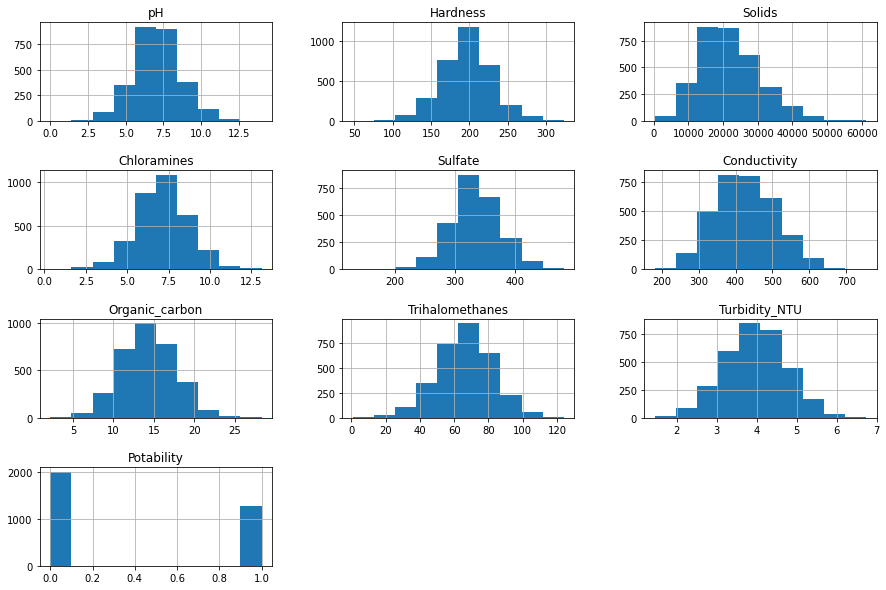

In [31]:
df2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

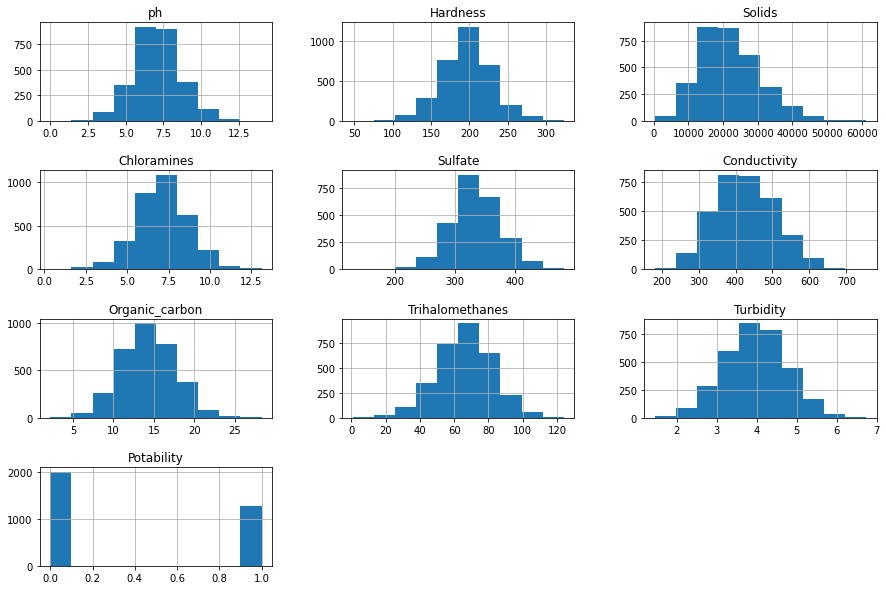

In [25]:
water_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);